In [1]:
import pandas as pd
from pandas.io.json import json_normalize
import json
import urllib
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

### Download list from API
http://explore.data.parliament.uk/?endpoint=commonsdivisions#download-list

In [188]:
df = pd.read_csv("commonsdivisions.csv")
df.head(413) #out of 500 is the 57th Parliament

,uri,date,title,uin
0,http://data.parliament.uk/resources/1110943,2019-04-10,Motion on 50th anniversary of the continuous a...,CD:2019-04-10:683
1,http://data.parliament.uk/resources/1110514,2019-04-09,Motion under section 1 of the European Union (...,CD:2019-04-09:682
2,http://data.parliament.uk/resources/1110164,2019-04-08,Motion to agree to Lords Amendments 2 and 3 to...,CD:2019-04-08:679
3,http://data.parliament.uk/resources/1110165,2019-04-08,Amendment (a) to Lords Amendment 5 to the EU (...,CD:2019-04-08:680
4,http://data.parliament.uk/resources/1110166,2019-04-08,Motion to agree to Lords Amendment 5 to the EU...,CD:2019-04-08:681
5,http://data.parliament.uk/resources/1109325,2019-04-03,Amendment (a) to the Business of the House motion,CD:2019-04-03:671
6,http://data.parliament.uk/resources/1109326,2019-04-03,Business of the House motion,CD:2019-04-03:672
7,http://data.parliament.uk/resources/1109329,2019-04-03,Second Reading of European Union (Withdrawal) ...,CD:2019-04-03:673
8,http://data.parliament.uk/resources/1109553,2019-04-03,European Union (Withdrawal) (No.5) Bill Commit...,CD:2019-04-03:674
9,http://data.parliament.uk/resources/1109554,2019-04-03,European Union (Withdrawal) (No.5) Bill Commit...,CD:2019-04-03:675


In [3]:
#Getting the code from the uri

li = []
for i in df['uri']:
    li.append(i.rsplit('/',1)[1])
    
li

['1110943',
 '1110514',
 '1110164',
 '1110165',
 '1110166',
 '1109325',
 '1109326',
 '1109329',
 '1109553',
 '1109554',
 '1109556',
 '1109591',
 '1109592',
 '1108990',
 '1108643',
 '1108904',
 '1108905',
 '1108906',
 '1108907',
 '1107737',
 '1105403',
 '1105521',
 '1105524',
 '1105526',
 '1105527',
 '1105529',
 '1105530',
 '1105532',
 '1105533',
 '1105759',
 '1105760',
 '1105761',
 '1105762',
 '1105763',
 '1105075',
 '1105078',
 '1105079',
 '1105082',
 '1105083',
 '1104623',
 '1104688',
 '1104689',
 '1093413',
 '1092053',
 '1092054',
 '1092055',
 '1092056',
 '1092058',
 '1091196',
 '1090450',
 '1088670',
 '1088673',
 '1088674',
 '1088675',
 '1088679',
 '1087761',
 '1087762',
 '1087775',
 '1087777',
 '1087778',
 '1086876',
 '1082511',
 '1082512',
 '1082513',
 '1082514',
 '1082515',
 '1082516',
 '1078368',
 '1078369',
 '1078370',
 '1078371',
 '1078372',
 '1078373',
 '1078390',
 '1078391',
 '1078392',
 '1077473',
 '1076721',
 '1063407',
 '1063411',
 '1063412',
 '1061008',
 '1061009',
 '10

In [174]:
b = list(zip(df['title'],li))
b = pd.DataFrame(b, columns = ['motion','code'])

### JSON access

In [4]:
finaldf = pd.DataFrame(columns=['motion', 'date'])

for i in li:
    url = urllib.request.urlopen('http://lda.data.parliament.uk/commonsdivisions/id/'+i+'.json')
    data = json.load(url)
    temp = json_normalize(data['result']['primaryTopic']['vote'])
    temp['motion'] = df['title'][li.index(i)]
    temp['date'] = df['date'][li.index(i)]
    finaldf = finaldf.append(temp, sort=True)
    #print(li.index(i))
    print(finaldf.shape)

(274, 7)
(804, 7)
(1282, 7)
(1759, 7)
(2230, 7)
(2850, 7)
(3473, 7)
(4097, 7)
(4714, 7)
(5333, 7)
(5944, 7)
(6569, 7)
(7183, 7)
(7501, 7)
(8100, 7)
(8643, 7)
(9192, 7)
(9764, 7)
(10247, 7)
(10877, 7)
(11495, 7)
(12055, 7)
(12527, 7)
(12968, 7)
(13504, 7)
(14048, 7)
(14525, 7)
(15088, 7)
(15649, 7)
(16194, 7)
(16753, 7)
(17090, 7)
(17645, 7)
(18201, 7)
(18758, 7)
(19355, 7)
(19956, 7)
(20541, 7)
(21120, 7)
(21751, 7)
(22377, 7)
(23004, 7)
(23088, 7)
(23441, 7)
(24021, 7)
(24554, 7)
(24908, 7)
(25401, 7)
(25734, 7)
(26266, 7)
(26685, 7)
(27310, 7)
(27936, 7)
(28556, 7)
(29171, 7)
(29721, 7)
(30311, 7)
(30849, 7)
(31470, 7)
(32069, 7)
(32702, 7)
(33255, 7)
(33600, 7)
(33943, 7)
(34289, 7)
(34846, 7)
(35397, 7)
(35994, 7)
(36571, 7)
(37177, 7)
(37782, 7)
(38359, 7)
(38958, 7)
(39521, 7)
(40133, 7)
(40655, 7)
(41001, 7)
(41537, 7)
(41887, 7)
(42238, 7)
(42573, 7)
(43201, 7)
(43609, 7)
(44171, 7)
(44746, 7)
(45315, 7)
(45871, 7)
(46421, 7)
(46970, 7)
(47510, 7)
(48051, 7)
(48615, 7)
(49179, 

In [5]:
finaldf['vote']=[i[-1] for i in finaldf['type'].str.split('#',1).tolist()]

In [190]:
finaldf.head(1)

,_about,date,member,memberParty,memberPrinted._value,motion,type,vote,vote1
0,http://data.parliament.uk/resources/1110943/vo...,2019-04-10,[{'_about': 'http://data.parliament.uk/members...,Conservative,Nigel Adams,Motion on 50th anniversary of the continuous a...,http://data.parliament.uk/schema/parl#AyeVote,AyeVote,1


In [9]:
finaldf['vote1'] = np.where(finaldf['vote']=='AyeVote', 1,-1)

In [45]:
print(finaldf.iloc[217388, :])
print(finaldf.iloc[217389, :])

_about                  http://data.parliament.uk/resources/746031/vot...
date                                                           2017-06-28
member                  [{'_about': 'http://data.parliament.uk/members...
memberParty                                                        Labour
memberPrinted._value                                 Mrs Emma Lewell-Buck
motion                  Queen's Speech: Health, Social Care and Securi...
type                        http://data.parliament.uk/schema/parl#AyeVote
vote                                                              AyeVote
vote1                                                                   1
Name: 631, dtype: object
_about                  http://data.parliament.uk/resources/722300/vote/1
date                                                           2017-04-19
member                  [{'_about': 'http://data.parliament.uk/members...
memberParty                                                        Labour
memberPrinted

### We only need 57th parliament

In [52]:
finaldf1 = finaldf.iloc[0:217389, :]  

In [54]:
finaldf1.tail()

,_about,date,member,memberParty,memberPrinted._value,motion,type,vote,vote1
627,http://data.parliament.uk/resources/746031/vot...,2017-06-28,[{'_about': 'http://data.parliament.uk/members...,Labour,Ms Karen Lee,"Queen's Speech: Health, Social Care and Securi...",http://data.parliament.uk/schema/parl#AyeVote,AyeVote,1
628,http://data.parliament.uk/resources/746031/vot...,2017-06-28,[{'_about': 'http://data.parliament.uk/members...,Labour (Co-op),Mr Chris Leslie,"Queen's Speech: Health, Social Care and Securi...",http://data.parliament.uk/schema/parl#AyeVote,AyeVote,1
629,http://data.parliament.uk/resources/746031/vot...,2017-06-28,[{'_about': 'http://data.parliament.uk/members...,Labour,Ann Clwyd,"Queen's Speech: Health, Social Care and Securi...",http://data.parliament.uk/schema/parl#AyeVote,AyeVote,1
630,http://data.parliament.uk/resources/746031/vot...,2017-06-28,[{'_about': 'http://data.parliament.uk/members...,Labour,Vernon Coaker,"Queen's Speech: Health, Social Care and Securi...",http://data.parliament.uk/schema/parl#AyeVote,AyeVote,1
631,http://data.parliament.uk/resources/746031/vot...,2017-06-28,[{'_about': 'http://data.parliament.uk/members...,Labour,Mrs Emma Lewell-Buck,"Queen's Speech: Health, Social Care and Securi...",http://data.parliament.uk/schema/parl#AyeVote,AyeVote,1


In [60]:
finaldf1['motion'].value_counts()
#finaldf['vote'].value_counts()

Business of the House motion                                                                                                           1217
UK's withdrawal from the EU: Mr Corbyn's amendment (a)                                                                                 1191
European Union (Withdrawal) Act main Motion (Prime Minister)                                                                            634
Section 13(1)(b) of the European Union (Withdrawal) Act main motion                                                                     633
Queen's Speech: Health, Social Care and Security Amendment (i)                                                                          632
Queen's Speech: Main Question                                                                                                           632
European Union Withdrawal Act Amendment (a) - Letwin                                                                                    631
No confidence in Her

In [66]:
finaldf1.to_csv("downloaded_01May2019.csv")

### Merging metadata

In [152]:
# Members and parties
metadata = finaldf1.drop_duplicates(subset='memberPrinted._value', keep='first')
metadata = metadata[['memberParty','memberPrinted._value']]
metadata.reset_index(drop=True, inplace=True)
metadata.to_csv("MP_party.csv")

In [178]:
# Codes to motions
finaldf1 = pd.merge(finaldf1, b, on='motion')
finaldf1.groupby(['date','motion','code','vote']).count().to_csv("HoC_motions.csv")
finaldf1

,_about,date,member,memberParty,memberPrinted._value,motion,type,vote,vote1,code
0,http://data.parliament.uk/resources/1110943/vo...,2019-04-10,[{'_about': 'http://data.parliament.uk/members...,Conservative,Nigel Adams,Motion on 50th anniversary of the continuous a...,http://data.parliament.uk/schema/parl#AyeVote,AyeVote,1,1110943
1,http://data.parliament.uk/resources/1110943/vo...,2019-04-10,[{'_about': 'http://data.parliament.uk/members...,Conservative,Guto Bebb,Motion on 50th anniversary of the continuous a...,http://data.parliament.uk/schema/parl#AyeVote,AyeVote,1,1110943
2,http://data.parliament.uk/resources/1110943/vo...,2019-04-10,[{'_about': 'http://data.parliament.uk/members...,Conservative,Chris Heaton-Harris,Motion on 50th anniversary of the continuous a...,http://data.parliament.uk/schema/parl#AyeVote,AyeVote,1,1110943
3,http://data.parliament.uk/resources/1110943/vo...,2019-04-10,[{'_about': 'http://data.parliament.uk/members...,Conservative,Peter Heaton-Jones,Motion on 50th anniversary of the continuous a...,http://data.parliament.uk/schema/parl#AyeVote,AyeVote,1,1110943
4,http://data.parliament.uk/resources/1110943/vo...,2019-04-10,[{'_about': 'http://data.parliament.uk/members...,Independent,Lady Hermon,Motion on 50th anniversary of the continuous a...,http://data.parliament.uk/schema/parl#AyeVote,AyeVote,1,1110943
5,http://data.parliament.uk/resources/1110943/vo...,2019-04-10,[{'_about': 'http://data.parliament.uk/members...,Conservative,Kevin Hollinrake,Motion on 50th anniversary of the continuous a...,http://data.parliament.uk/schema/parl#AyeVote,AyeVote,1,1110943
6,http://data.parliament.uk/resources/1110943/vo...,2019-04-10,[{'_about': 'http://data.parliament.uk/members...,Conservative,Mr Philip Hollobone,Motion on 50th anniversary of the continuous a...,http://data.parliament.uk/schema/parl#AyeVote,AyeVote,1,1110943
7,http://data.parliament.uk/resources/1110943/vo...,2019-04-10,[{'_about': 'http://data.parliament.uk/members...,Conservative,Nigel Huddleston,Motion on 50th anniversary of the continuous a...,http://data.parliament.uk/schema/parl#AyeVote,AyeVote,1,1110943
8,http://data.parliament.uk/resources/1110943/vo...,2019-04-10,[{'_about': 'http://data.parliament.uk/members...,Conservative,Eddie Hughes,Motion on 50th anniversary of the continuous a...,http://data.parliament.uk/schema/parl#AyeVote,AyeVote,1,1110943
9,http://data.parliament.uk/resources/1110943/vo...,2019-04-10,[{'_about': 'http://data.parliament.uk/members...,Conservative,Mr Jeremy Hunt,Motion on 50th anniversary of the continuous a...,http://data.parliament.uk/schema/parl#AyeVote,AyeVote,1,1110943


### Motivating network charts

In [55]:
B = nx.Graph()
B.add_nodes_from(finaldf1['memberPrinted._value'], bipartite=0)
B.add_nodes_from(finaldf1['vote'], bipartite=1)
B.add_edges_from([(row['memberPrinted._value'], row['vote']) for idx, row in finaldf1.iterrows()])

name, vote = nx.bipartite.sets(B)
len(name) #out of 650

667

In [56]:
yes = finaldf1[finaldf1['vote'] == 'AyeVote']
no = finaldf1[finaldf1['vote'] == 'NoVote']

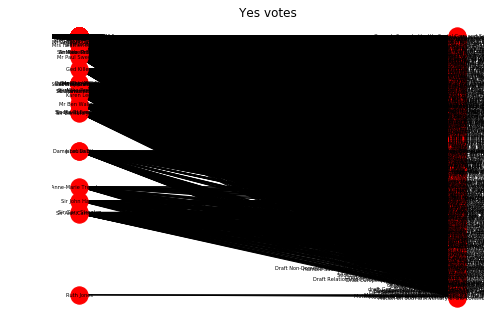

In [57]:
B1 = nx.Graph()
B1.add_nodes_from(yes['memberPrinted._value'], bipartite=0)
B1.add_nodes_from(yes['motion'], bipartite=1)
B1.add_edges_from([(row['memberPrinted._value'], row['motion']) for idx, row in yes.iterrows()])

name, motion = nx.bipartite.sets(B1)
pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(yes['memberPrinted._value']) ) # put nodes from X at x=1
pos.update( (n, (2, i)) for i, n in enumerate(yes['motion']) ) # put nodes from Y at x=2
nx.draw(B1, pos=pos)
nx.draw_networkx_labels(B1, pos, node_size=10,font_size=5)
plt.title('Yes votes')
plt.show()

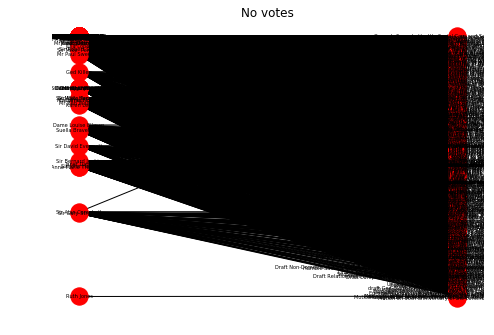

In [58]:
B2 = nx.Graph()
B2.add_nodes_from(no['memberPrinted._value'], bipartite=0)
B2.add_nodes_from(no['motion'], bipartite=1)
B2.add_edges_from([(row['memberPrinted._value'], row['motion']) for idx, row in no.iterrows()])

name, motion = nx.bipartite.sets(B2)
pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(no['memberPrinted._value']) ) # put nodes from X at x=1
pos.update( (n, (2, i)) for i, n in enumerate(no['motion']) ) # put nodes from Y at x=2
nx.draw(B2, pos=pos)
nx.draw_networkx_labels(B2, pos, node_size=10,font_size=5)
plt.title('No votes')
plt.show()

### Pivot Table and data cleaning

In [61]:
table = pd.pivot_table(finaldf1, values='vote1', index=['memberPrinted._value'], columns=['motion'], aggfunc=np.sum)

motion,EU (Withdrawal) Act Section 13 Amdt (o) - Blackford,Agriculture Bill: Second Reading Jeremy Corbyn's Amdt,Air Travel Organisers' Bill: Committee of the whole House Amdt 3,Air Travel Organisers' Licensing Bill: Committee of the whole House Amdt 2,Air Travel Organisers' Licensing Bill: Committee of the whole House New Clause 1,Amendment (a) to Lords Amendment 5 to the EU (Withdrawal) (No. 5) Bill,Amendment (a) to the Business of the House motion,Amendment (a) to the motion on the UK's withdrawal from the European Union,Amendment (a): Privilege (Withdrawal Agreement legal advice),Amendment (f) to the motion on the UK's withdrawal from the European Union,...,draft Immigration (Health Charge) (Amendment) Order 2018,draft Intellectural Property (Copyright and Related Rights) (Amendment) (EU Exit) Regulations 2018,draft Long-term Investment Funds (Amendment) (EU Exit) Regulations 2019,draft Markets in Financial Instruments (Amendment) (EU Exit) Regulations 2018,draft Official Listing of Securities Prospectus and Transparency (Amendment etc.) (EU Exit) Regulations 2019,draft Organic Production (Control of Imports) (Amendment) (EU Exit) Regulations 2019,draft Organic Production and Control (Amendment) (EU Exit) Regulations 2019,draft Product Safety and Metrology etc. (Amendment etc.) (EU Exit) Regulations 2019,draft REACH etc. (Amendment etc.) (EU Exit) Regulations 2019,draft Waste (Miscellaneous Amendments) (EU Exit) Regulations 2019
memberPrinted._value,,,,,,,,,,,,,,,,,,,,,
Adam Afriyie,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Adam Holloway,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,...,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0
Afzal Khan,NaN,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,...,NaN,-1.0,NaN,-1.0,-1.0,NaN,NaN,-1.0,-1.0,-1.0
Alan Brown,1.0,NaN,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,NaN,-1.0,NaN,-1.0,-1.0,NaN,NaN
Alan Mak,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Albert Owen,NaN,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,NaN,-1.0,NaN,NaN,-1.0,-1.0,-1.0
Alberto Costa,NaN,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,-1.0,1.0,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Alec Shelbrooke,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,-1.0,-1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0
Alex Burghart,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


**Data cleaning code below**

In [144]:
mp_table = table.reset_index().replace({'memberPrinted._value': \
                             {'Mrs Louise Ellman':'Dame Louise Ellman', \
                             'David Evennett':'Sir David Evennett',\
                             'Preet Gill':'Preet Kaur Gill',\
                             'Mrs Cheryl Gillan':'Dame Cheryl Gillan',\
                             'Mr John Hayes':'Sir John Hayes',\
                             'Mr Mark Hendrick':'Sir Mark Hendrick',\
                             'Damian Hinds':'Mr Damian Hinds',\
                             'Mr Nick  Hurd':'Mr Nick Hurd',\
                             'Mr Bernard Jenkin':'Sir Bernard Jenkin',\
                             'Ged Killen':'Gerard Killen',\
                             'Karen Lee':'Ms Karen Lee',\
                             'Caroline  Nokes':'Caroline Nokes',\
                             'Mr Gary Streeter':'Sir Gary Streeter',\
                             'Mr Paul J Sweeney':'Mr Paul Sweeney',\
                             'Mr Robert Syms':'Sir Robert Syms',\
                             'Anne-Marie Trevelyan':'Mrs Anne-Marie Trevelyan',\
                             'Mr Ben  Wallace':'Mr Ben Wallace',\
                             'Mr Alan Campbell':'Sir Alan Campbell',\
                             'Geoffrey Clifton-Brown':'Sir Geoffrey Clifton-Brown',\
                             'Mr Christopher Chope':'Sir Christopher Chope',\
                             'Mike Penning':'Sir Mike Penning',\
                             'Sir Mike  Penning':'Sir Mike Penning',\
                             'Mr Graham Brady':'Sir Graham Brady',\
                             'Sammy  Wilson':'Sammy Wilson',\
                             'Suella Fernandes':'Suella Braverman',\
                             'Julia Dockerill':'Julia Lopez',\
                             'Paul Flynn':'Ruth Jones',\
                             'Heidi Alexander':'Janet Daby'}\
                            }).groupby('memberPrinted._value').sum()
                             
#married name: 'Suella Fernandes':'Suella Braverman' 
#married name: 'Julia Dockerill':'Julia Lopez'
#death: 'Paul Flynn':'Ruth Jones' #PaulFlynn died 17Feb2019; succeeded by Ruth Jones
#resignation: 'Heidi Alexander':'Janet Daby' #resigned in May 2018 to join the mayoral team.

print("expected table size (650-11):", 650-11) #this should be the table size
print("mp_table size:",mp_table.shape)

expected table size (650-11): 639
mp_table size: (639, 409)


In [145]:
mp_table
#note that groupby function makes the NaN into zero. +1 = aye; -1 = no

motion,EU (Withdrawal) Act Section 13 Amdt (o) - Blackford,Agriculture Bill: Second Reading Jeremy Corbyn's Amdt,Air Travel Organisers' Bill: Committee of the whole House Amdt 3,Air Travel Organisers' Licensing Bill: Committee of the whole House Amdt 2,Air Travel Organisers' Licensing Bill: Committee of the whole House New Clause 1,Amendment (a) to Lords Amendment 5 to the EU (Withdrawal) (No. 5) Bill,Amendment (a) to the Business of the House motion,Amendment (a) to the motion on the UK's withdrawal from the European Union,Amendment (a): Privilege (Withdrawal Agreement legal advice),Amendment (f) to the motion on the UK's withdrawal from the European Union,...,draft Immigration (Health Charge) (Amendment) Order 2018,draft Intellectural Property (Copyright and Related Rights) (Amendment) (EU Exit) Regulations 2018,draft Long-term Investment Funds (Amendment) (EU Exit) Regulations 2019,draft Markets in Financial Instruments (Amendment) (EU Exit) Regulations 2018,draft Official Listing of Securities Prospectus and Transparency (Amendment etc.) (EU Exit) Regulations 2019,draft Organic Production (Control of Imports) (Amendment) (EU Exit) Regulations 2019,draft Organic Production and Control (Amendment) (EU Exit) Regulations 2019,draft Product Safety and Metrology etc. (Amendment etc.) (EU Exit) Regulations 2019,draft REACH etc. (Amendment etc.) (EU Exit) Regulations 2019,draft Waste (Miscellaneous Amendments) (EU Exit) Regulations 2019
memberPrinted._value,,,,,,,,,,,,,,,,,,,,,
Adam Afriyie,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Adam Holloway,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
Afzal Khan,0.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,...,0.0,-1.0,0.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,-1.0
Alan Brown,1.0,0.0,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,0.0,-1.0,0.0,-1.0,-1.0,0.0,0.0
Alan Mak,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Albert Owen,0.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,0.0,-1.0,0.0,0.0,-1.0,-1.0,-1.0
Alberto Costa,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Alec Shelbrooke,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
Alex Burghart,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [97]:
#activate to check
#mp_table.to_csv("check.csv")

In [123]:
MPs = list(mp_table.index.values) 

## Dot product - adjacency matrices

In [120]:
import numpy as np

a = np.array(mp_table)
a.shape

(639, 409)

In [126]:
dp = pd.DataFrame(np.dot(a,a.transpose()), columns=MPs, index=MPs)
dp

#the diagonal should be the max.

,Adam Afriyie,Adam Holloway,Afzal Khan,Alan Brown,Alan Mak,Albert Owen,Alberto Costa,Alec Shelbrooke,Alex Burghart,Alex Chalk,...,Victoria Prentis,Wayne David,Wendy Morton,Wera Hobhouse,Wes Streeting,Will Quince,Yasmin Qureshi,Yvette Cooper,Yvonne Fovargue,Zac Goldsmith
Adam Afriyie,388.0,330.0,-297.0,-278.0,350.0,-287.0,318.0,309.0,352.0,337.0,...,332.0,-298.0,310.0,-267.0,-300.0,363.0,-263.0,-282.0,-259.0,363.0
Adam Holloway,330.0,341.0,-260.0,-247.0,305.0,-251.0,278.0,268.0,309.0,298.0,...,293.0,-263.0,264.0,-244.0,-265.0,318.0,-237.0,-250.0,-223.0,323.0
Afzal Khan,-297.0,-260.0,352.0,256.0,-279.0,313.0,-253.0,-250.0,-282.0,-271.0,...,-278.0,339.0,-235.0,278.0,334.0,-282.0,295.0,317.0,294.0,-283.0
Alan Brown,-278.0,-247.0,256.0,304.0,-270.0,251.0,-246.0,-249.0,-272.0,-262.0,...,-270.0,256.0,-234.0,250.0,266.0,-273.0,240.0,249.0,224.0,-271.0
Alan Mak,350.0,305.0,-279.0,-270.0,384.0,-275.0,344.0,323.0,373.0,365.0,...,353.0,-281.0,325.0,-253.0,-284.0,367.0,-249.0,-267.0,-249.0,347.0
Albert Owen,-287.0,-251.0,313.0,251.0,-275.0,333.0,-242.0,-244.0,-271.0,-259.0,...,-268.0,312.0,-230.0,269.0,312.0,-275.0,276.0,296.0,274.0,-275.0
Alberto Costa,318.0,278.0,-253.0,-246.0,344.0,-242.0,372.0,314.0,352.0,355.0,...,346.0,-256.0,306.0,-239.0,-266.0,340.0,-224.0,-248.0,-233.0,320.0
Alec Shelbrooke,309.0,268.0,-250.0,-249.0,323.0,-244.0,314.0,337.0,333.0,326.0,...,317.0,-248.0,281.0,-230.0,-251.0,319.0,-221.0,-241.0,-225.0,306.0
Alex Burghart,352.0,309.0,-282.0,-272.0,373.0,-271.0,352.0,333.0,388.0,373.0,...,359.0,-286.0,334.0,-255.0,-286.0,373.0,-254.0,-269.0,-255.0,352.0
Alex Chalk,337.0,298.0,-271.0,-262.0,365.0,-259.0,355.0,326.0,373.0,393.0,...,370.0,-276.0,325.0,-254.0,-279.0,361.0,-245.0,-262.0,-252.0,338.0


In [118]:
dp.shape

(639, 639)

In [127]:
dp.to_csv("adjmat.csv")

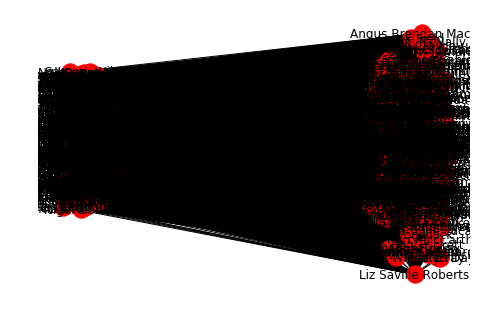

In [151]:
G = nx.Graph(dp)
nx.draw(G, with_labels = True)